In [1]:
import pandas as pd 
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split #For spliting data into 2 sets of train and test

from sklearn.feature_selection import mutual_info_classif #For calculating information gain

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Farsi language processing lib
#!pip install hazm
from hazm import *

In [2]:
df_raw = pd.read_csv("products.csv")
df_raw.head()

,_key,url,name,price,مشخصات فیزیکی/ابعاد,مشخصات فیزیکی/وزن,پردازنده مرکزی/سازنده پردازنده,پردازنده مرکزی/سری پردازنده,پردازنده مرکزی/مدل پردازنده,پردازنده مرکزی/محدوده سرعت پردازنده,...,حافظه داخلی/مشخصات حافظه داخلی,پردازنده گرافیکی/سازنده پردازنده گرافیکی,پردازنده گرافیکی/مدل پردازنده گرافیکی,پردازنده گرافیکی/حافظه اختصاصی پردازنده گرافیکی,صفحه نمایش/اندازه صفحه نمایش,صفحه نمایش/نوع صفحه نمایش,صفحه نمایش/دقت صفحه نمایش,صفحه نمایش/صفحه نمایش مات,صفحه نمایش/صفحه نمایش لمسی,صفحه نمایش/توضیحات صفحه نمایش
0,807845,https://www.digikala.com/product/dkp-807845,Lenovo ThinkPad E590 - E 15.6 Inch laptop,"۱۵,۹۰۰,۰۰۰",19.9 × 242 × 329 میلی‌متر,2.1 کیلوگرم,Intel,Core i3,8145U,تا 2.0GHz,...,سرعت چرخش 5400 دور بر دقیقه,Intel,UHD Graphics 620,بدون حافظه‌ی گرافیکی مجزا,15.6 اینچ,TFT LED-backlit LCD,HD|1366x768,بله,خیر,نسبت تصویر 16:9
1,1165258,https://www.digikala.com/product/dkp-1165258,Lenovo Ideapad 330 - BQ - 15 inch Laptop,"۲۷,۵۰۰,۰۰۰",22.9 × 260 × 378 میلی‌متر,2.2 کیلوگرم,Intel,Core i7,8550U,تا 2.0GHz,...,5400RPM,NVIDIA,GeForce MX150 GDDR5,4GB,15.6 اینچ,TFT LED-backlit LCD,Full HD| 1920 x1080,بله,خیر,نسبت تصویر 16.9
2,1722266,https://www.digikala.com/product/dkp-1722266,Apple MacBook Pro MV962 2019 - 13 inch Laptop ...,"۴۹,۹۹۹,۰۰۰",14.9 × 212.4 × 304.1 میلی‌متر,1.37 کیلوگرم,Intel,Core i5,Intel Core i5 quad-core Coffee Lake (8279U),2.2 تا 2.5 گیگاهرتز,...,PCIe-based onboard,Intel,Intel Iris Plus Graphics 640,بدون حافظه‌ی گرافیکی مجزا,13.3 اینچ,IPS LED-backlit LCD,QHD|2560x1600,خیر,خیر,نسبت تصویر 16:9 و 227 پیکسل در هر اینچ
3,1722812,https://www.digikala.com/product/dkp-1722812,Apple MacBook Pro MV972 2019 - 13 inch Laptop ...,"۵۴,۹۹۹,۰۰۰",14.9 × 212.4 × 304.1 میلی‌متر,1.37 کیلوگرم,Intel,Core i5,Intel Core i5 quad-core Coffee Lake (8279U),2.2 تا 2.5 گیگاهرتز,...,PCIe-based onboard,Intel,Intel Iris Plus Graphics 640,بدون حافظه‌ی گرافیکی مجزا,13.3 اینچ,IPS LED-backlit LCD,QHD|2560x1600,خیر,خیر,نسبت تصویر 16:9 و 227 پیکسل در هر اینچ
4,1743571,https://www.digikala.com/product/dkp-1743571,Lenovo ThinkPad E590 - A 15.6 Inch laptop,"۲۳,۲۹۹,۰۰۰",329.3x242x19.9 میلی‌متر,2.1 کیلوگرم,Intel,Core i5,8265U,2.8 گیگاهرتز و بیشتر,...,5400RPM,AMD,AMD Radeon RX550,2GB,15.6 اینچ,TFT LED-backlit LCD,HD|1366x768,بله,خیر,NaN


In [3]:
df_raw = df_raw.drop(columns=['url',
                              'name',
                              'پردازنده مرکزی/مدل پردازنده','پردازنده مرکزی/فرکانس پردازنده',
                              'حافظه داخلی/مشخصات حافظه داخلی',
                              'پردازنده گرافیکی/سازنده پردازنده گرافیکی',
                              'پردازنده گرافیکی/مدل پردازنده گرافیکی',
                              'پردازنده گرافیکی/حافظه اختصاصی پردازنده گرافیکی',
                              'صفحه نمایش/نوع صفحه نمایش',
                              'مشخصات فیزیکی/ابعاد',
                              'صفحه نمایش/صفحه نمایش مات',
                              'صفحه نمایش/صفحه نمایش لمسی',
                              'صفحه نمایش/توضیحات صفحه نمایش',
                              'حافظه داخلی/ظرفیت حافظه داخلی',
                              'حافظه داخلی/نوع حافظه داخلی'
                             ])
df_raw

,_key,price,مشخصات فیزیکی/وزن,پردازنده مرکزی/سازنده پردازنده,پردازنده مرکزی/سری پردازنده,پردازنده مرکزی/محدوده سرعت پردازنده,پردازنده مرکزی/حافظه Cache,حافظه RAM/ظرفیت حافظه RAM,حافظه RAM/نوع حافظه RAM,صفحه نمایش/اندازه صفحه نمایش,صفحه نمایش/دقت صفحه نمایش
0,807845,"۱۵,۹۰۰,۰۰۰",2.1 کیلوگرم,Intel,Core i3,تا 2.0GHz,4 مگابایت,4 گیگابایت,DDR4,15.6 اینچ,HD|1366x768
1,1165258,"۲۷,۵۰۰,۰۰۰",2.2 کیلوگرم,Intel,Core i7,تا 2.0GHz,8 مگابایت,16 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
2,1722266,"۴۹,۹۹۹,۰۰۰",1.37 کیلوگرم,Intel,Core i5,2.2 تا 2.5 گیگاهرتز,6 مگابایت,8 گیگابایت,DDR4,13.3 اینچ,QHD|2560x1600
3,1722812,"۵۴,۹۹۹,۰۰۰",1.37 کیلوگرم,Intel,Core i5,2.2 تا 2.5 گیگاهرتز,6 مگابایت,8 گیگابایت,DDR4,13.3 اینچ,QHD|2560x1600
4,1743571,"۲۳,۲۹۹,۰۰۰",2.1 کیلوگرم,Intel,Core i5,2.8 گیگاهرتز و بیشتر,6 مگابایت,8 گیگابایت,DDR4,15.6 اینچ,HD|1366x768
...,...,...,...,...,...,...,...,...,...,...,...
225,3629341,"۲۸,۴۱۰,۰۰۰",1.9 کیلوگرم,Intel,Core i7,NaN,8 مگابایت,8 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
226,3634340,"۳۱,۸۰۰,۰۰۰",1.9 کیلوگرم,Intel,Core i7,2.8 گیگاهرتز و بیشتر,8 مگابایت,8 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
227,3634341,"۳۲,۸۰۰,۰۰۰",1.9 کیلوگرم,Intel,Core i7,2.8 گیگاهرتز و بیشتر,8 مگابایت,12 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
228,3634646,"۴۸,۶۰۰,۰۰۰",1.15 کیلوگرم,Intel,Core i7,تا 2.0GHz,8 مگابایت,16 گیگابایت,DDR3,14 اینچ,Full HD| 1920 x1080


In [4]:
df_raw = df_raw.rename(columns={'مشخصات فیزیکی/وزن': 'Weight',
                                'پردازنده مرکزی/سازنده پردازنده':'CPUCompany',
                                'پردازنده مرکزی/سری پردازنده':'CPUModel',
                                'پردازنده مرکزی/محدوده سرعت پردازنده':'CPUSpeed',
                                'پردازنده مرکزی/حافظه Cache':'CPUCacheSize',
                                'صفحه نمایش/اندازه صفحه نمایش':'DisplaySize',
                                'حافظه RAM/ظرفیت حافظه RAM':'RAMCapacity',
                                'حافظه RAM/نوع حافظه RAM':'RAMTechnology'
                               })
df_raw

,_key,price,Weight,CPUCompany,CPUModel,CPUSpeed,CPUCacheSize,RAMCapacity,RAMTechnology,DisplaySize,صفحه نمایش/دقت صفحه نمایش
0,807845,"۱۵,۹۰۰,۰۰۰",2.1 کیلوگرم,Intel,Core i3,تا 2.0GHz,4 مگابایت,4 گیگابایت,DDR4,15.6 اینچ,HD|1366x768
1,1165258,"۲۷,۵۰۰,۰۰۰",2.2 کیلوگرم,Intel,Core i7,تا 2.0GHz,8 مگابایت,16 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
2,1722266,"۴۹,۹۹۹,۰۰۰",1.37 کیلوگرم,Intel,Core i5,2.2 تا 2.5 گیگاهرتز,6 مگابایت,8 گیگابایت,DDR4,13.3 اینچ,QHD|2560x1600
3,1722812,"۵۴,۹۹۹,۰۰۰",1.37 کیلوگرم,Intel,Core i5,2.2 تا 2.5 گیگاهرتز,6 مگابایت,8 گیگابایت,DDR4,13.3 اینچ,QHD|2560x1600
4,1743571,"۲۳,۲۹۹,۰۰۰",2.1 کیلوگرم,Intel,Core i5,2.8 گیگاهرتز و بیشتر,6 مگابایت,8 گیگابایت,DDR4,15.6 اینچ,HD|1366x768
...,...,...,...,...,...,...,...,...,...,...,...
225,3629341,"۲۸,۴۱۰,۰۰۰",1.9 کیلوگرم,Intel,Core i7,NaN,8 مگابایت,8 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
226,3634340,"۳۱,۸۰۰,۰۰۰",1.9 کیلوگرم,Intel,Core i7,2.8 گیگاهرتز و بیشتر,8 مگابایت,8 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
227,3634341,"۳۲,۸۰۰,۰۰۰",1.9 کیلوگرم,Intel,Core i7,2.8 گیگاهرتز و بیشتر,8 مگابایت,12 گیگابایت,DDR4,15.6 اینچ,Full HD| 1920 x1080
228,3634646,"۴۸,۶۰۰,۰۰۰",1.15 کیلوگرم,Intel,Core i7,تا 2.0GHz,8 مگابایت,16 گیگابایت,DDR3,14 اینچ,Full HD| 1920 x1080


In [5]:
df = pd.read_csv("processed.csv")

In [6]:
df.head()

,ProductID,Price,Weight,DisplaySize,DisplayPixelWidth,DisplayPixelHeight,CPUCompany,CPUModel,CPUSpeed,CPUCacheSize,RAMCapacity,RAMTechnology
0,3585871,28100000,1.90,15.6,1920,1080,Intel,Core i7,2.8,8.0,8,DDR4
1,2896649,17640000,2.20,15.6,1366,768,Intel,Core i3,2.0,4.0,4,DDR4
2,3635241,39990000,1.09,14.0,1920,1080,Intel,Core i7,2.8,8.0,16,DDR4
3,3430580,55350000,1.90,15.6,1920,1080,Intel,Core i7,NaN,8.0,16,DDR4
4,3659939,17100000,2.10,15.6,1920,1080,Intel,Core i3,2.8,4.0,4,DDR4


In [7]:
X_encoded = pd.get_dummies(df, columns=['CPUModel', 'CPUCompany','RAMTechnology'], drop_first=True)
X_encoded

,ProductID,Price,Weight,DisplaySize,DisplayPixelWidth,DisplayPixelHeight,CPUSpeed,CPUCacheSize,RAMCapacity,CPUModel_Bristol Ridge,...,CPUModel_Core i3,CPUModel_Core i5,CPUModel_Core i7,CPUModel_Pentium,CPUModel_Ryzen 3,CPUModel_Ryzen 5,CPUModel_Ryzen 7,CPUModel_Xeon,CPUCompany_Intel,RAMTechnology_DDR4
0,3585871,28100000,1.90,15.6,1920,1080,2.8,8.0,8,0,...,0,0,1,0,0,0,0,0,1,1
1,2896649,17640000,2.20,15.6,1366,768,2.0,4.0,4,0,...,1,0,0,0,0,0,0,0,1,1
2,3635241,39990000,1.09,14.0,1920,1080,2.8,8.0,16,0,...,0,0,1,0,0,0,0,0,1,1
3,3430580,55350000,1.90,15.6,1920,1080,NaN,8.0,16,0,...,0,0,1,0,0,0,0,0,1,1
4,3659939,17100000,2.10,15.6,1920,1080,2.8,4.0,4,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,3373528,24710000,2.00,15.6,1366,768,2.0,6.0,8,0,...,0,1,0,0,0,0,0,0,1,1
243,3516152,27990000,1.70,15.6,1920,1080,2.8,6.0,16,0,...,0,1,0,0,0,0,0,0,1,1
244,3579826,43000000,2.20,15.6,1920,1080,2.5,12.0,16,0,...,0,0,1,0,0,0,0,0,1,1
245,3644096,33000000,1.80,15.6,1920,1080,NaN,6.0,8,0,...,0,1,0,0,0,0,0,0,1,1


In [8]:
X_encoded = X_encoded.dropna() 
X_encoded

,ProductID,Price,Weight,DisplaySize,DisplayPixelWidth,DisplayPixelHeight,CPUSpeed,CPUCacheSize,RAMCapacity,CPUModel_Bristol Ridge,...,CPUModel_Core i3,CPUModel_Core i5,CPUModel_Core i7,CPUModel_Pentium,CPUModel_Ryzen 3,CPUModel_Ryzen 5,CPUModel_Ryzen 7,CPUModel_Xeon,CPUCompany_Intel,RAMTechnology_DDR4
0,3585871,28100000,1.90,15.6,1920,1080,2.8,8.0,8,0,...,0,0,1,0,0,0,0,0,1,1
1,2896649,17640000,2.20,15.6,1366,768,2.0,4.0,4,0,...,1,0,0,0,0,0,0,0,1,1
2,3635241,39990000,1.09,14.0,1920,1080,2.8,8.0,16,0,...,0,0,1,0,0,0,0,0,1,1
4,3659939,17100000,2.10,15.6,1920,1080,2.8,4.0,4,0,...,1,0,0,0,0,0,0,0,1,1
5,3560381,66940000,2.30,15.6,1920,1080,2.5,12.0,16,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,3545629,117000000,2.60,17.3,1920,1080,2.8,12.0,32,0,...,0,0,1,0,0,0,0,0,1,1
241,3587135,16340000,2.10,15.6,1366,768,2.2,4.0,4,0,...,1,0,0,0,0,0,0,0,1,1
242,3373528,24710000,2.00,15.6,1366,768,2.0,6.0,8,0,...,0,1,0,0,0,0,0,0,1,1
243,3516152,27990000,1.70,15.6,1920,1080,2.8,6.0,16,0,...,0,1,0,0,0,0,0,0,1,1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Gain')

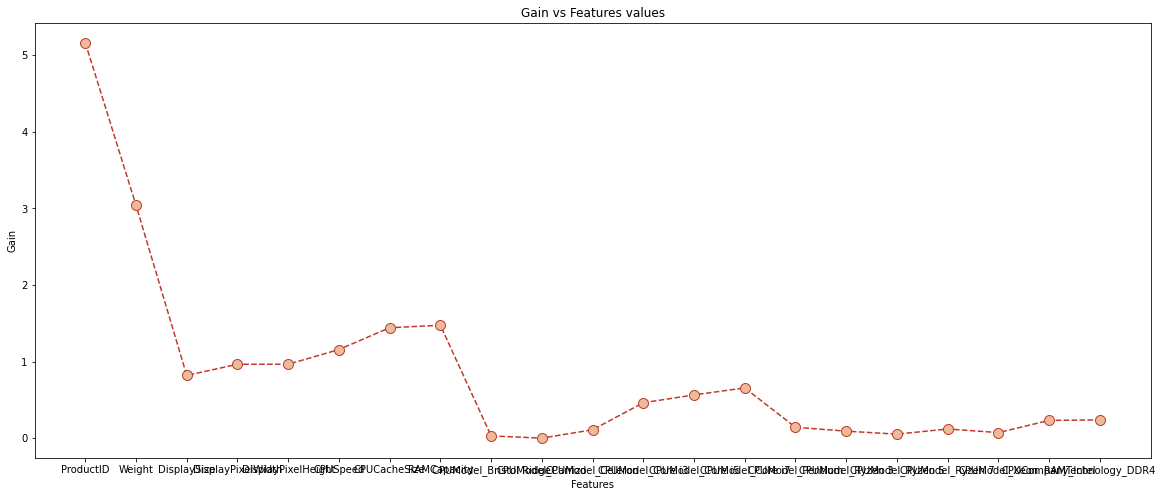

In [9]:
y = X_encoded['Price']
X_mic = X_encoded.drop(columns=['Price'])
mic = mutual_info_classif(X_mic, y, discrete_features=True)
# X_mic 
# y
fig = plt.figure(figsize=(20,8))
plt.plot(X_mic.columns, mic, color='#C0392B', linestyle='dashed', marker='o', markerfacecolor='#EDBB99', markersize=10)
plt.title('Gain vs Features values')
plt.xlabel('Features')
plt.ylabel('Gain')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Gain')

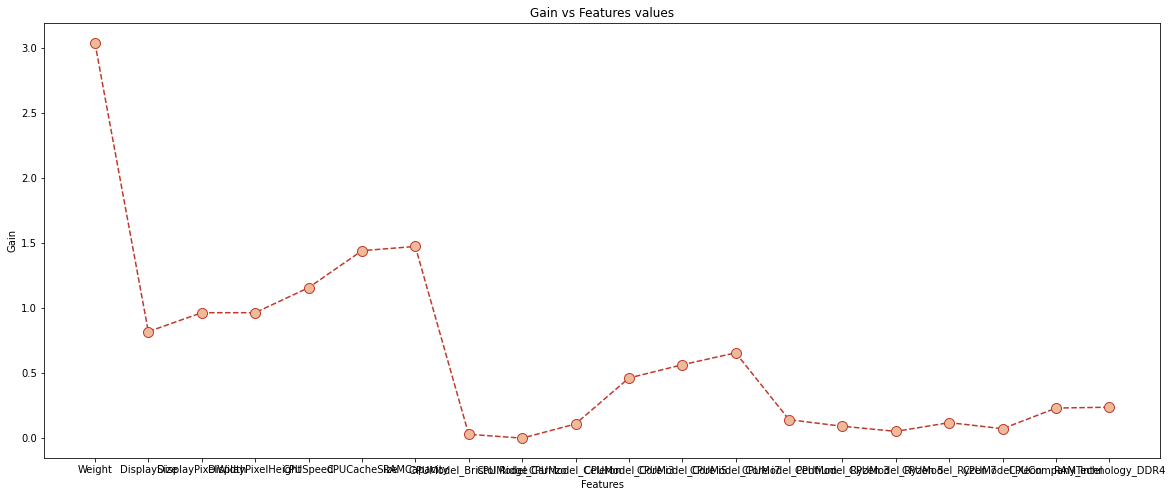

In [10]:
X_mic = X_mic.drop(columns=['ProductID'])
mic = mutual_info_classif(X_mic, y, discrete_features=True)
# X_mic 
# y
fig = plt.figure(figsize=(20,8))
plt.plot(X_mic.columns, mic, color='#C0392B', linestyle='dashed', marker='o', markerfacecolor='#EDBB99', markersize=10)
plt.title('Gain vs Features values')
plt.xlabel('Features')
plt.ylabel('Gain')

In [11]:
#seprating dataset for train and test
X_train , X_test ,y_train , y_test = train_test_split(X_mic,y, test_size=0.2, train_size=0.8, shuffle=True)

In [12]:
# preproccessing and normalization then fitting a model
# X_trainp = X_train.reshape(-1,1)
y_trainp = y_train.ravel()
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_trainp)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [13]:
coeffs = pd.DataFrame(reg.named_steps['sgdregressor'].coef_,X_mic.columns,columns=['Coefficient'])
coeffs

,Coefficient
Weight,8.052738e+05
DisplaySize,-3.736587e+06
DisplayPixelWidth,-1.427068e+06
DisplayPixelHeight,5.961204e+06
CPUSpeed,2.919868e+05
CPUCacheSize,1.073003e+07
RAMCapacity,7.150747e+06
CPUModel_Bristol Ridge,8.409091e+05
CPUModel_Carrizo,0.000000e+00
CPUModel_Celeron,-8.546970e+05


In [14]:
# testing model
# X_testp = X_test.reshape(-1,1)
yhat = reg.predict(X_test)

In [15]:
# checking accuracy of model
reg.score(X_test,y_test)

0.7732834818688565

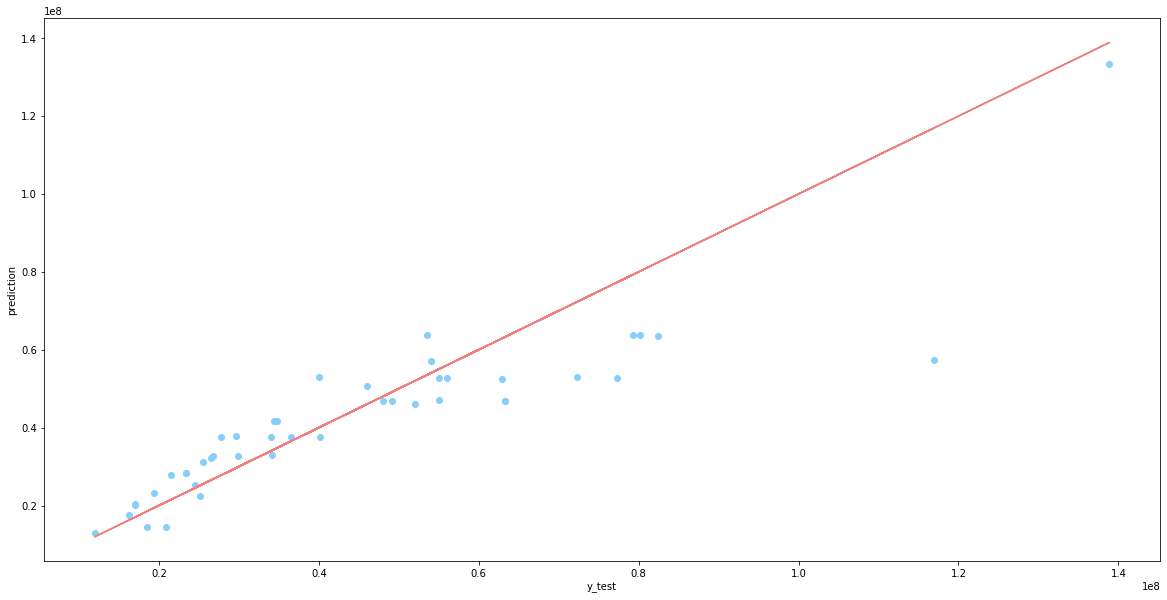

In [16]:
# ploting dataset and linear model together
plt.figure(figsize=(20,10))
plt.scatter(y_test,yhat, c = 'lightskyblue')
plt.ylabel("prediction")
plt.xlabel("y_test")
plt.plot(y_test,y_test, color='lightcoral')



In [17]:
#sample function for predictig price from given engine size
org_fields =['Weight','DisplaySize','DisplayPixelWidth','DisplayPixelHeight','CPUSpeed','CPUCacheSize','RAMCapacity']
def sample(data):
    temp = {}
    for col in X_mic.columns:
        temp.update({str(col):[0]})
        
    for k in temp.keys():
        if(k in org_fields):
            temp[k][0] = data[k]
        else:
            for i in ['CPUModel', 'CPUCompany','RAMTechnology']:
                if(data[i] in str(k)):
                    temp[k][0]=1
    
            
    x =pd.DataFrame(temp)
    price = reg.predict(x) 
    return price[0]

In [18]:
data={'Weight':2.0,
      'DisplaySize':16.0,
      'DisplayPixelWidth':1920,
      'DisplayPixelHeight':1080,
      'CPUCompany':'Intel',
      'CPUModel':'Core i9',
      'CPUSpeed':3.0,
      'CPUCacheSize':16.0,
      'RAMCapacity':32,
      'RAMTechnology':'DDR4'
     }
sample(data)

81149735.6232358

In [19]:
#fairness function which indicates if the price is higher or lower than what it should be
def fairness(data,price,epsilon):
    pricehat = sample(data)
    if(abs(price - pricehat) <= epsilon*pricehat):
        print("fair")
    else:
        if(price > pricehat):
            print('more expensive')
        else:
            print('cheaper')

In [20]:
fairness(data,91522065,0.05)

more expensive
